In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset.csv to Netflix Dataset.csv


In [4]:
df = pd.read_csv('Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.drop_duplicates(subset='Show_Id', inplace=True)

In [7]:
df.fillna({
    'Director': 'Unknown',
    'Cast': 'Unknown',
    'Country': 'Unknown',
    'Rating': 'Not Rated',
    'Duration': 'Unknown'
}, inplace=True)

In [8]:
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

In [9]:
print("Total Titles:", len(df))
print("Movies:", (df['Category'] == 'Movie').sum())
print("TV Shows:", (df['Category'] == 'TV Show').sum())
print("\nYear Range:", int(df['Year'].min()), "-", int(df['Year'].max()))

Total Titles: 7787
Movies: 5377
TV Shows: 2410

Year Range: 2008 - 2021


Movies vs TV Shows Over the Years

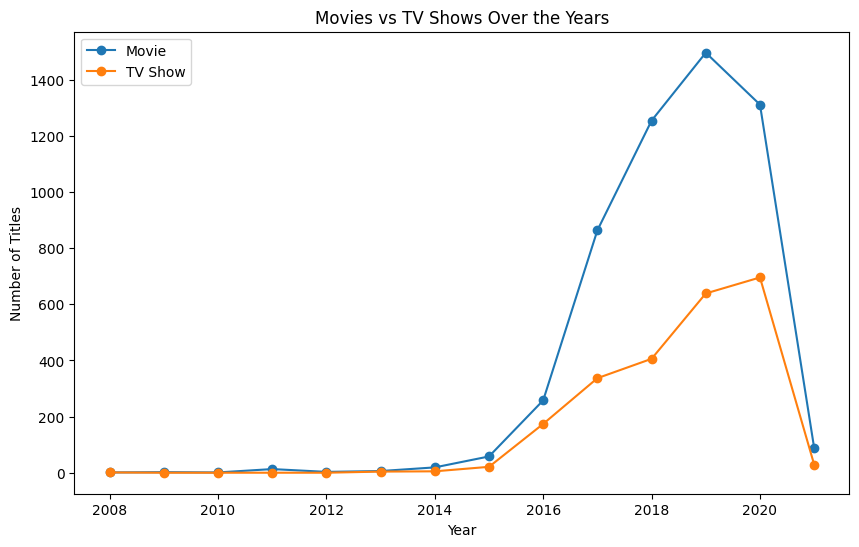

In [10]:
count_year = df.groupby(['Year','Category']).size().unstack(fill_value=0)
count_year.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.show()

Top 10 Countries by Movies & TV Shows

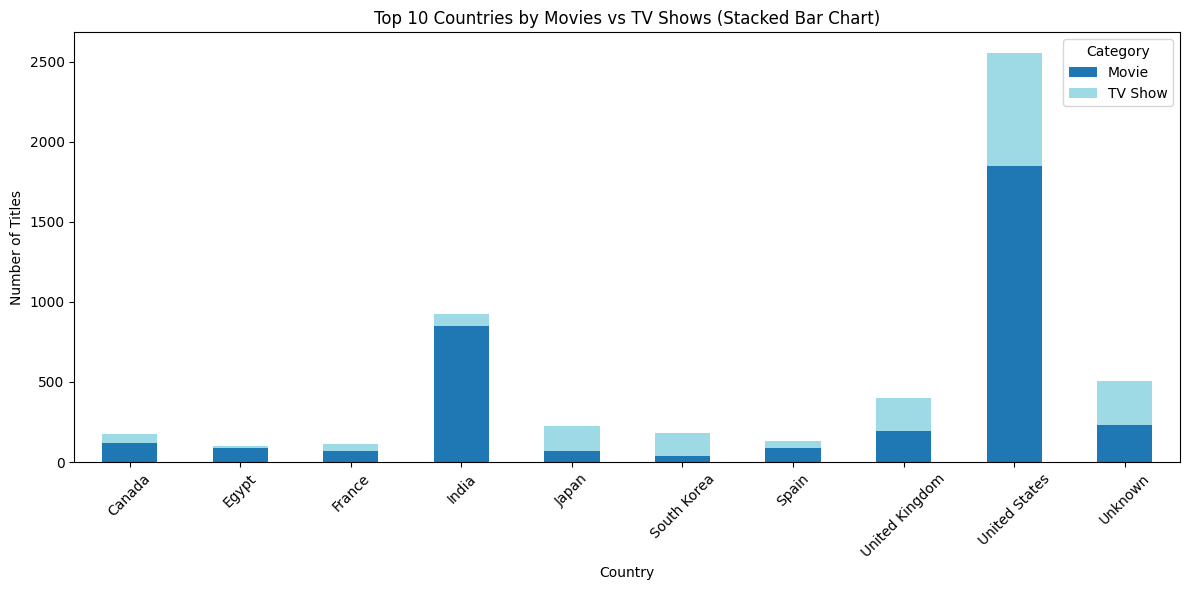

In [17]:
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked_data = (
    country_data.groupby(['Country', 'Category'])
    .size()
    .unstack(fill_value=0)
)
stacked_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title('Top 10 Countries by Movies vs TV Shows (Stacked Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


Top 10  Genres

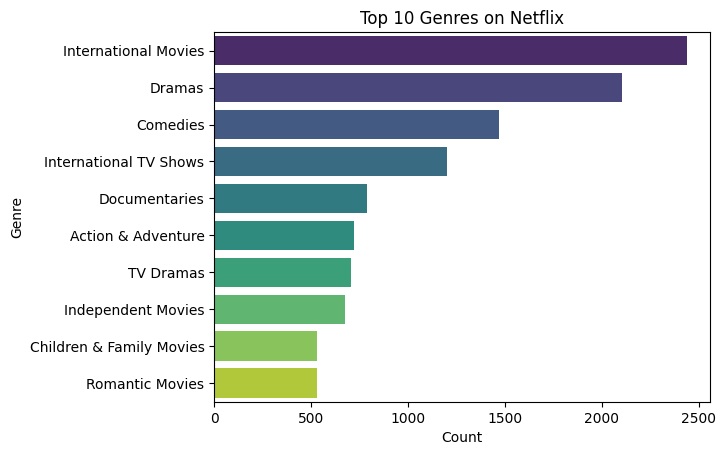

In [12]:
genres = df['Type'].dropna().str.split(',')
all_genres = [g.strip() for sublist in genres for g in sublist]
top_genres = pd.Series(all_genres).value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']
sns.barplot(
    data=top_genres,
    y='Genre',
    x='Count',
    hue='Genre',
    palette='viridis',
    legend=False
)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Trend of Popular Genres Over Time

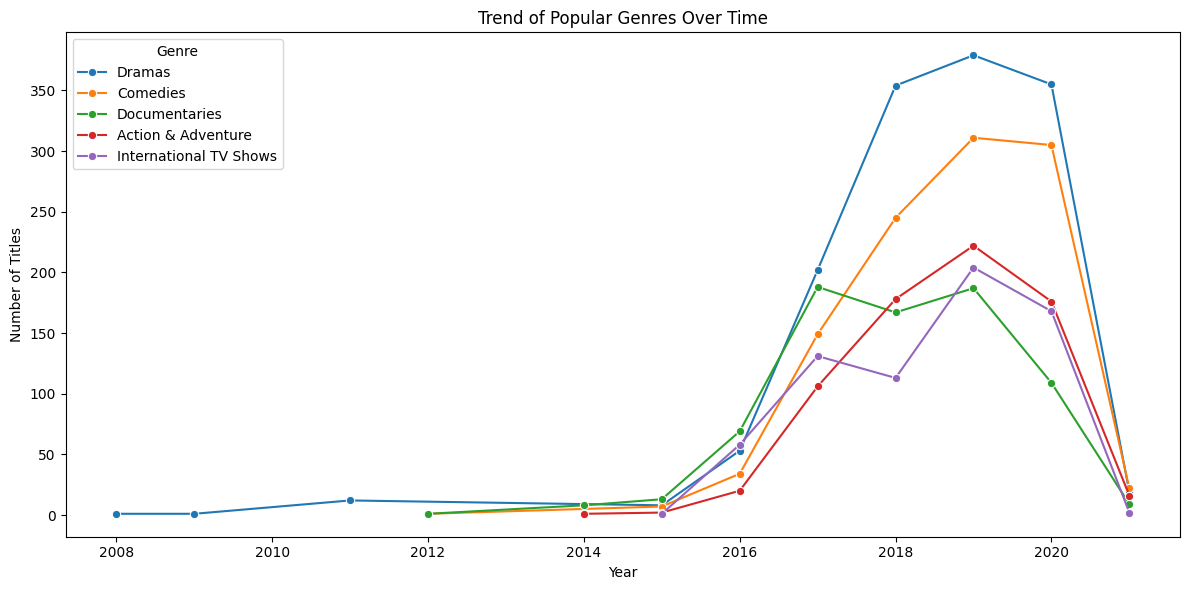

In [20]:
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else "Unknown")
top_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = (
    df[df['Main_Genre'].isin(top_genres)]
    .groupby(['Year', 'Main_Genre'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker='o')

plt.title('Trend of Popular Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

Rating Distribution

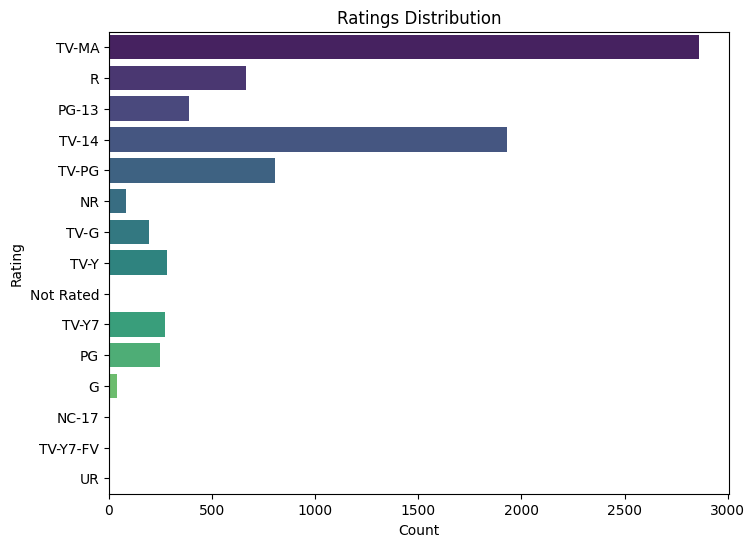

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(
    y=df['Rating'],
    hue=df['Rating'],
    dodge=False,
    palette="viridis",
    legend=False
)

plt.title("Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

Most Common Words in the Description

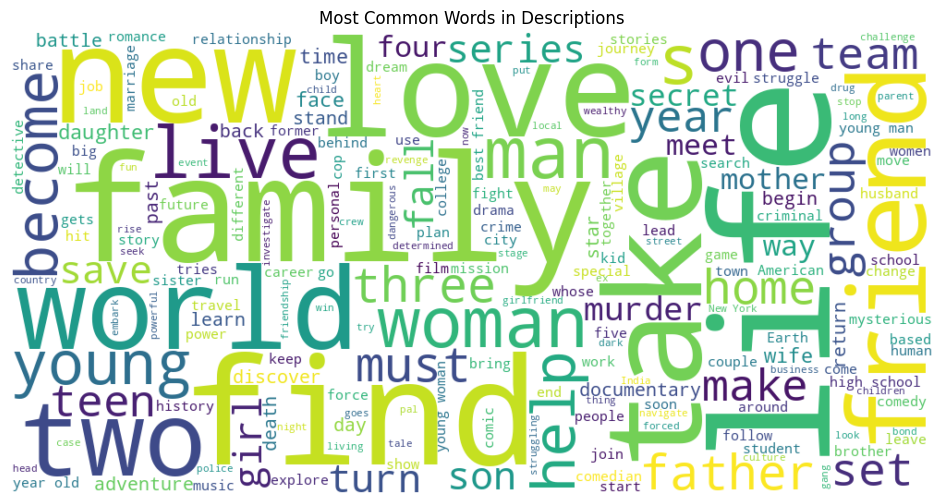

In [14]:
text = " ".join(df['Description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Descriptions")
plt.show()